# Text Classification with StyloMetrix
> In this notebook, we will show how to apply StyloMetrix vectors for both supervised and unsupervised classification on an easily available benchmark for spam detection.

## Required Packages

In [ ]:
## Install packages and libraries that are not default

!pip install patool
!python -m spacy download en_core_web_trf
!pip install spacy-transformers
!pip install stylo-metrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 852.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
## load the spacy model
import spacy
nlp = spacy.load('en_core_web_trf')

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
## download the dataset

!curl -O https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip

In [ ]:
## unzip the dataset
import patoolib
patoolib.extract_archive('sms+spam+collection.zip')

INFO patool: Extracting sms+spam+collection.zip ...
INFO:patool:Extracting sms+spam+collection.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_2t2cr8wd -- sms+spam+collection.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_2t2cr8wd -- sms+spam+collection.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... sms+spam+collection.zip extracted to `sms+spam+collection' (multiple files in root).
INFO:patool:... sms+spam+collection.zip extracted to `sms+spam+collection' (multiple files in root).


'sms+spam+collection'

In [ ]:
## load the data from the file

import pandas as pd
sms = pd.read_table('./sms+spam+collection/SMSSpamCollection', header=None, encoding='utf-8')
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## split the text data into training data and labels

data = sms[1]
labels = sms[0]

In [ ]:
# labels = labels[:1000]     ## uncomment if you want to test only a slice of the dataset

In [ ]:
## transform text data into StyloMetrix vectors
## ATTENTION! It can take about 10-15 minutes on this particular dataset!

import numpy as np
import stylo_metrix as sm
stylo = sm.StyloMetrix('en')
data_sm = stylo.transform(data)
# data_sm = stylo.transform(data[:1000])  ## uncomment if you want to test only a slice of the dataset, the slice dimension must match the dimension of the labels
data_sm.to_csv('./sms+spam+collection/SMSSpamCollection_StyloMetrix.csv', index=False)
print(data_sm)

## you can additionaly save the calculated vectors in a csv file with "numpy.to_csv" function

 26%|██▌       | 262/1000 [00:52<01:57,  6.29it/s]

float division by zero
 AT METRIC ST_HERDAN_TTR, TEXT: Yup...


100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s]


                                                  text  POS_VERB  POS_NOUN  \
0    Go until jurong point, crazy.. Available only ...  0.100000  0.050000   
1                        Ok lar... Joking wif u oni...  0.166667  0.000000   
2    Free entry in 2 a wkly comp to win FA Cup fina...  0.142857  0.357143   
3    U dun say so early hor... U c already then say...  0.363636  0.000000   
4    Nah I don't think he goes to usf, he lives aro...  0.307692  0.000000   
..                                                 ...       ...       ...   
995                  I can't, I don't have her number!  0.428571  0.142857   
996    Change again... It's e one next to escalator...  0.250000  0.125000   
997  Yetunde i'm in class can you not run water on ...  0.235294  0.176471   
998  Not a lot has happened here. Feels very quiet....  0.258065  0.129032   
999  Then ü wait 4 me at bus stop aft ur lect lar. ...  0.241379  0.172414   

      POS_ADJ   POS_ADV   POS_DET  POS_INTJ  POS_CONJ  POS_PART

In [ ]:
## Some of the data was not transformed due to the error of zero division.
## We need to search the data_sm dataFrame for NaNs and match them with the original dataFrame to drop the matching rows from the labels.
## Otherwise the dimensions of labels will not match the dimension of vectors to train.

# Step 1: Find indices of rows with NaNs in data_sm
nan_indices = data_sm[data_sm.isnull().any(axis=1)].index

# Step 2: Remove rows with these indices from both "data_sm" and the "labels" dataFrame
data_sm_clean = data_sm.drop(index=nan_indices)
labels_clean = labels.drop(index=nan_indices)

In [ ]:
## The last step of preparing the data is to drop the 'text' column' from the data_sm_clean. This way the dataFrame will contain StyloMetrix embeddings only.

data_sm_clean = data_sm_clean.drop(['text'], axis=1)
data_sm_clean.head()

KeyError: "['text'] not found in axis"

## Supervised Learning - RandomForest and XGBoost

In [ ]:
## Now we split the data into train and test set
from sklearn.model_selection import train_test_split

# Split the data - 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data_sm_clean, labels_clean, test_size=0.2, random_state=42)


In [ ]:
## Encoding the labels

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the training labels to learn all possible classes and transform them to numeric
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test labels to numeric using the same encoder
y_test_encoded = label_encoder.transform(y_test)

# Now y_train_encoded and y_test_encoded contain the encoded labels for training and testing


In [ ]:
##  Let's start with training both XGBoost and RandomForest classifiers!
## The classification report will be shown together with confusion matrices

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np


# Step 2: Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust parameters as needed
rf_clf.fit(X_train, y_train_encoded)

# Train the XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') # Adjust parameters and suppress warning
xgb_clf.fit(X_train, y_train_encoded)


# Step 3: Evaluate the models
def evaluate_model(clf, X_test, Y_test_encoded):
    # Make predictions
    Y_pred = clf.predict(X_test)

    # Calculate metrics
    # accuracy = accuracy_score(Y_test_encoded, Y_pred)
    # precision, recall, f1, _ = precision_recall_fscore_support(Y_test_encoded, Y_pred, average='weighted')

    # # Print the metrics
    # print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Print Classification report
    print(classification_report(Y_test_encoded, Y_pred))

    return Y_pred

print("Random Forest Evaluation:")
rf_predictions = evaluate_model(rf_clf, X_test, y_test_encoded)

print("\nXGBoost Evaluation:")
xgb_predictions = evaluate_model(xgb_clf, X_test, y_test_encoded)


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       169
           1       0.96      0.71      0.81        31

    accuracy                           0.95       200
   macro avg       0.95      0.85      0.89       200
weighted avg       0.95      0.95      0.95       200

Confusion Matrix:
 [[168   1]
 [  9  22]]

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       169
           1       0.96      0.81      0.88        31

    accuracy                           0.96       200
   macro avg       0.96      0.90      0.93       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
 [[168   1]
 [  6  25]]


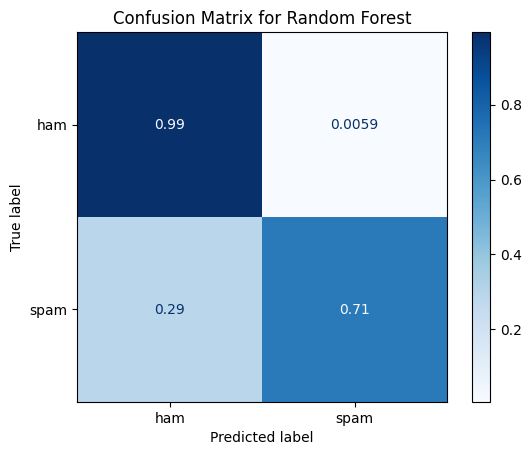

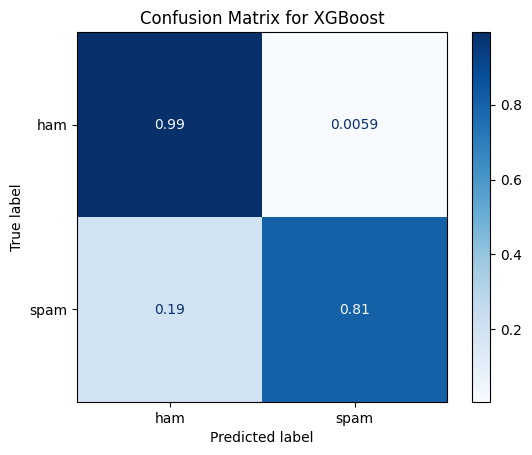

In [ ]:
import matplotlib.pyplot as plt

def plot_cm(
    Y_test_encoded,
    Y_pred,
    normalize,
    labels=None,
    save=False,
    directory=None,
    filename=None,
    title="",
    cmap=plt.cm.Blues,
    xticks_rotation="vertical",
):
    labels = label_encoder.classes_
    cm = confusion_matrix(Y_test_encoded, Y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=cmap, xticks_rotation=xticks_rotation)
    plt.title(title)
    if save:
        directory = Path(directory)
        directory.mkdir(parents=True, exist_ok=True)
        plt.savefig(directory / filename)
        plt.close()
    else:
        plt.show()

from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from wordcloud import WordCloud

plot_cm(y_test_encoded, rf_predictions, 'true', labels, xticks_rotation="horizontal", title='Confusion Matrix for Random Forest')

plot_cm(y_test_encoded, xgb_predictions, 'true', labels, xticks_rotation="horizontal", title='Confusion Matrix for XGBoost')

## Unsupervised learning - data clustering with KMeans and DBScan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


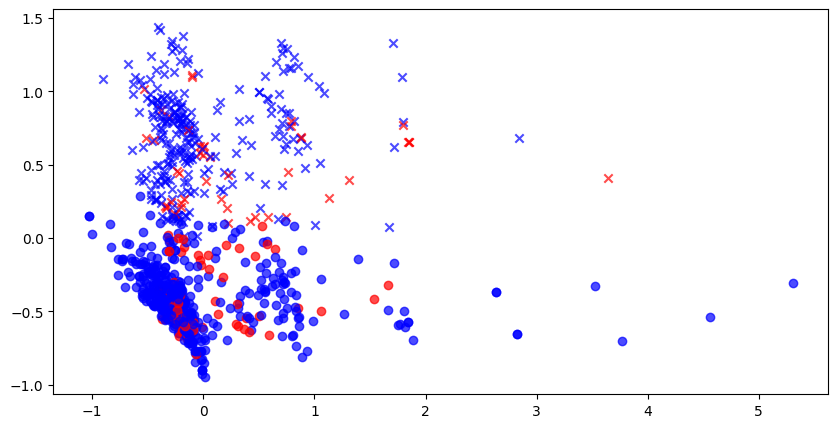

In [ ]:
## KMeans

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # Optional, for visualization
import matplotlib.pyplot as plt  # Optional, for visualization


# Visualizing the clusters
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_train)
plt.figure(figsize=(10, 5))

# Choosing the number of clusters (k)
k = 2  # the number of classes in the dataset

# Clustering
kmeans = KMeans(n_clusters=k, random_state=0, tol=1e-3)
kmeans_cluster = kmeans.fit_predict(X_train)
X_train['cluster'] = kmeans_cluster



# Annotating each point
colors = ['r', 'b']
markers = ['o', 'x']
for i, txt in enumerate(y_train):
    cls = list(X_train['cluster'])[i]
    lbl = 1 if list(y_train)[i] == 'ham' else 0
    # plt.annotate(txt, (reduced[i, 0], reduced[i, 1]))    ## optional, if there aren't too many samples to show
    plt.scatter(reduced[i, 0], reduced[i, 1], c=colors[lbl], marker=markers[cls], alpha=0.7)
plt.show()

<ipython-input-102-862c9cc15827>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sm_clean['cluster_db'][:50] = clusters_dbscan


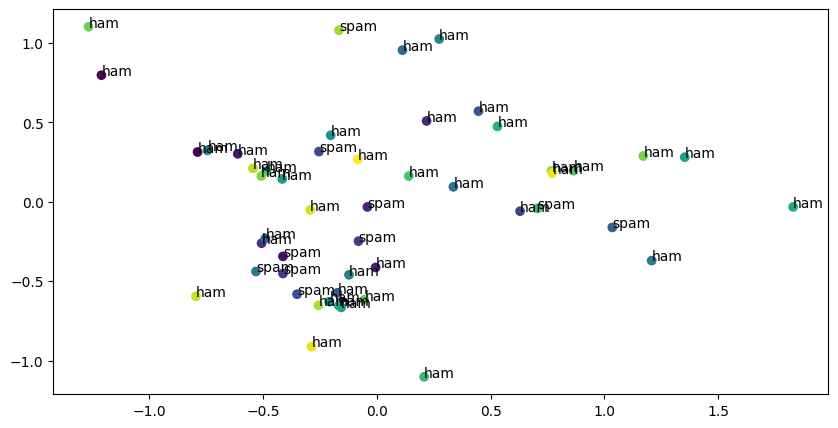

In [ ]:
# Visualizing the clusters
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_sm_clean[:50])
plt.figure(figsize=(10, 5))

# Apply DBSCAN on the entire dataset
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.025, min_samples=1, p=2)
clusters_dbscan = dbscan.fit_predict(data_sm_clean[:50])

# Add the cluster labels to your DataFrame
data_sm_clean['cluster_db'][:50] = clusters_dbscan

# Annotating each point
plt.scatter(reduced[:, 0], reduced[:, 1], c=data_sm_clean['cluster_db'][:50])
# Annotating each point
for i, txt in enumerate(labels_clean[:50]):
    plt.annotate(txt, (reduced[i, 0], reduced[i, 1]))
plt.show()